# ETL - LOAD

In [73]:
%matplotlib inline

In [52]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import DATABASE_URI
import datetime

In [53]:
# Create connection
engine = create_engine(DATABASE_URI)
conn = engine.connect()

In [54]:
# Import csv files to load in database and inspect
# FinalMoviesBudget
FinalMoviesBudget = pd.read_csv('FinalMoviesBudget.csv')
FinalMoviesBudget.head()

,id,title,vote_count,vote_average,revenue,runtime,popularity,ReleaseDate,ProductionBudget,DomesticGross,WorldwideGross
0,299534,Avengers: Endgame,15589,8.3,2797800564,181.0,193.659,2019-04-23,400000000,858373000,2797800564
1,1865,Pirates of the Caribbean: On Stranger Tides,10375,6.5,1045713802,136.0,79.193,2011-05-20,379000000,241063875,1045663875
2,99861,Avengers: Age of Ultron,16755,7.3,1405403694,141.0,85.183,2015-04-22,365000000,459005868,1396099202
3,299536,Avengers: Infinity War,20088,8.3,2046239637,149.0,229.850,2018-04-25,300000000,678815482,2044540523
4,141052,Justice League,9747,6.2,657924295,120.0,112.464,2017-11-13,300000000,229024295,655945209


In [55]:
# Convert Date column to date time object
FinalMoviesBudget['ReleaseDate'] = pd.to_datetime(FinalMoviesBudget['ReleaseDate'])

In [56]:
# Convert column to lower case to avoid error while loading into database
FinalMoviesBudget.columns = FinalMoviesBudget.columns.str.lower()

In [60]:
# netflix_movies_revenue
netflix_movies_revenue = pd.read_csv('netflix_movies_revenue.csv')
netflix_movies_revenue.head()

,id,title,country,release_year,rating,revenue,vote_count,vote_average,runtime,popularity
0,601131,Norm of the North: King Sized Adventure,United States,2019,TV-PG,1442504,4,7.6,90.0,8.420
1,415722,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,0,2,5.0,94.0,0.600
2,262543,Automata,Bulgaria,2014,R,0,1171,5.8,110.0,25.466
3,262338,Good People,United States,2014,R,0,324,5.5,90.0,28.195
4,474599,Joaquín Reyes: Una y no más,unknown,2017,TV-MA,0,1,6.0,77.0,0.600


In [61]:
# inspect data types
netflix_movies_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3148 non-null   int64  
 1   title         3148 non-null   object 
 2   country       3148 non-null   object 
 3   release_year  3148 non-null   int64  
 4   rating        3148 non-null   object 
 5   revenue       3148 non-null   int64  
 6   vote_count    3148 non-null   int64  
 7   vote_average  3148 non-null   float64
 8   runtime       3148 non-null   float64
 9   popularity    3148 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 246.1+ KB


In [58]:
# Check tables if loaded
engine.table_names()

['finalmoviesbudget', 'netflix_movies_revenue']

In [59]:
# Load finalmoviesbudget to the database
FinalMoviesBudget.to_sql(name = 'finalmoviesbudget', con = engine, if_exists = 'append', index = False)

In [62]:
netflix_movies_revenue.to_sql(name = 'netflix_movies_revenue', con = engine, if_exists = 'append', index = False)

In [63]:
# Query moviesbudget_db to confirm tables are loaded
# finalmoviesbudget
pd.read_sql_query('SELECT * FROM finalmoviesbudget', con = engine).head()


,id,title,vote_count,vote_average,revenue,runtime,popularity,releasedate,productionbudget,domesticgross,worldwidegross
0,299534,Avengers: Endgame,15589,8.3,2797800564,181.0,193.659,2019-04-23,400000000,858373000,2797800564
1,1865,Pirates of the Caribbean: On Stranger Tides,10375,6.5,1045713802,136.0,79.193,2011-05-20,379000000,241063875,1045663875
2,99861,Avengers: Age of Ultron,16755,7.3,1405403694,141.0,85.183,2015-04-22,365000000,459005868,1396099202
3,299536,Avengers: Infinity War,20088,8.3,2046239637,149.0,229.850,2018-04-25,300000000,678815482,2044540523
4,141052,Justice League,9747,6.2,657924295,120.0,112.464,2017-11-13,300000000,229024295,655945209


In [64]:
# Query finalmoviesbudget to confirm tables are loaded
# netflix_movies_revenue
pd.read_sql_query('SELECT * FROM netflix_movies_revenue', con = engine).head()

,id,title,country,release_year,rating,revenue,vote_count,vote_average,runtime,popularity
0,601131,Norm of the North: King Sized Adventure,United States,2019,TV-PG,1442504,4,7.6,90.0,8.420
1,415722,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,0,2,5.0,94.0,0.600
2,262543,Automata,Bulgaria,2014,R,0,1171,5.8,110.0,25.466
3,262338,Good People,United States,2014,R,0,324,5.5,90.0,28.195
4,474599,Joaquín Reyes: Una y no más,unknown,2017,TV-MA,0,1,6.0,77.0,0.600


In [69]:
# Budget Analysis
# load 
budget = pd.read_sql_query('SELECT * FROM finalmoviesbudget', con = engine)

In [70]:
# Top 10 budget movies
top_10_budget = budget.sort_values('productionbudget', ascending=False).head(10)
top_10_budget

,id,title,vote_count,vote_average,revenue,runtime,popularity,releasedate,productionbudget,domesticgross,worldwidegross
0,299534,Avengers: Endgame,15589,8.3,2797800564,181.0,193.659,2019-04-23,400000000,858373000,2797800564
1,1865,Pirates of the Caribbean: On Stranger Tides,10375,6.5,1045713802,136.0,79.193,2011-05-20,379000000,241063875,1045663875
2,99861,Avengers: Age of Ultron,16755,7.3,1405403694,141.0,85.183,2015-04-22,365000000,459005868,1396099202
3,299536,Avengers: Infinity War,20088,8.3,2046239637,149.0,229.850,2018-04-25,300000000,678815482,2044540523
4,141052,Justice League,9747,6.2,657924295,120.0,112.464,2017-11-13,300000000,229024295,655945209
5,206647,Spectre,7924,6.5,880674609,148.0,66.378,2015-10-06,300000000,200074175,879500760
6,181812,Star Wars: The Rise of Skywalker,5850,6.6,1074144248,142.0,164.723,2019-12-18,275000000,515202542,1072944222
7,348350,Solo: A Star Wars Story,5726,6.6,392952373,135.0,66.493,2018-05-23,275000000,213767512,393151347
8,49529,John Carter,4022,6.2,284139100,132.0,31.818,2012-03-07,263700000,73058679,282778100
9,209112,Batman v Superman: Dawn of Justice,13960,5.9,873634919,152.0,61.188,2016-03-23,263000000,330360194,872395091


In [95]:
# Extract title, productionbudget, domesticgross, worldwidegross
top_10_budget[['title', 'productionbudget', 'worldwidegross']]

,title,productionbudget,worldwidegross
0,Avengers: Endgame,400000000,2797800564
1,Pirates of the Caribbean: On Stranger Tides,379000000,1045663875
2,Avengers: Age of Ultron,365000000,1396099202
3,Avengers: Infinity War,300000000,2044540523
4,Justice League,300000000,655945209
5,Spectre,300000000,879500760
6,Star Wars: The Rise of Skywalker,275000000,1072944222
7,Solo: A Star Wars Story,275000000,393151347
8,John Carter,263700000,282778100
9,Batman v Superman: Dawn of Justice,263000000,872395091


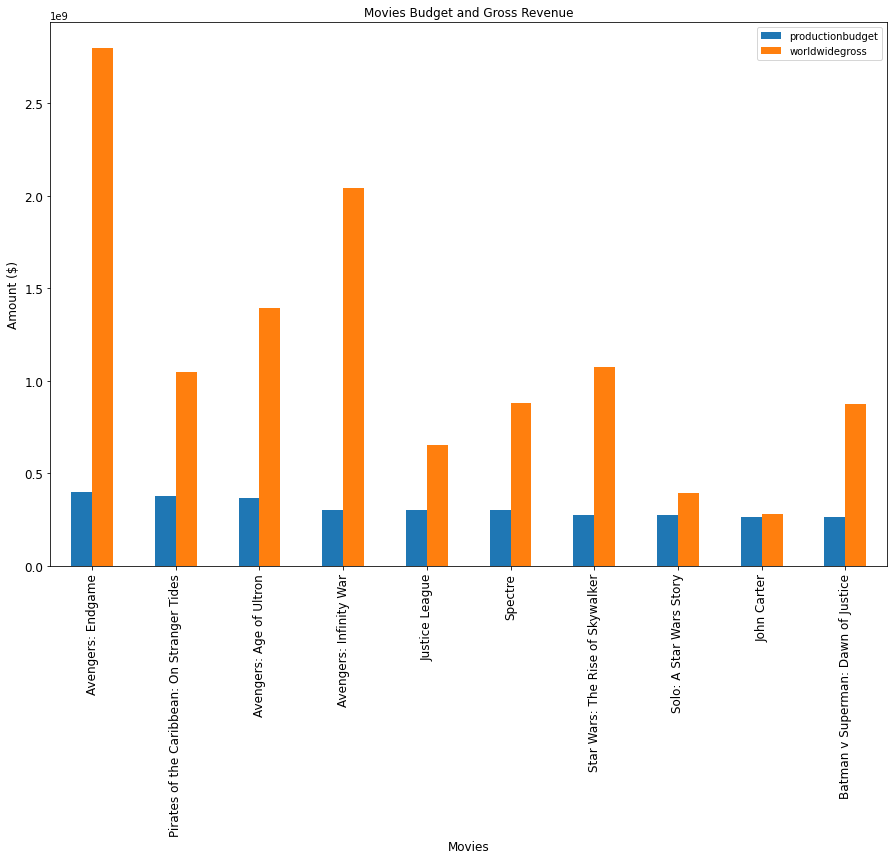

In [104]:
# Bar chart of top 10 budget
ax = top_10_budget[['productionbudget', 'worldwidegross']].plot(kind='bar', title ="Movies Budget and Gross Revenue", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Movies", fontsize=12)
ax.set_xticklabels(top_10_budget['title'], rotation=90)
ax.set_ylabel("Amount ($)", fontsize=12)
plt.savefig('budget_gross_top10.png')
plt.show()

In [82]:
# Netflix top 10 budget movies
# First merge netflix_movies_revenue and finalmoviesbudget
netflix_titles = pd.read_sql_query('SELECT * FROM netflix_movies_revenue', con = engine)

In [88]:
netflix_title_df = netflix_titles['id']
netflix_title_df.head()

0    601131
1    415722
2    262543
3    262338
4    474599
Name: id, dtype: int64

In [89]:
# Merge netflix_title_df with budget
NetflixBudgetMerged = pd.merge(netflix_title_df, budget, on = 'id')
NetflixBudgetMerged.head()

,id,title,vote_count,vote_average,revenue,runtime,popularity,releasedate,productionbudget,domesticgross,worldwidegross
0,51828,One Day,2859,7.3,59389433,107.0,24.024,2011-06-23,15000000,13843771,59168692
1,51828,One Day,2859,7.3,59389433,107.0,24.024,2011-06-23,15000000,13843771,59168692
2,284054,Black Panther,16267,7.4,1346739107,134.0,103.072,2018-02-13,200000000,700059566,1336547105
3,78698,Big Miracle,317,6.5,24719215,107.0,10.703,2012-02-03,40000000,20157300,25268680
4,459992,Long Shot,1649,6.8,53847136,125.0,35.972,2019-05-01,40000000,30316271,53624424


In [90]:
NetflixBudgetMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                492 non-null    int64  
 1   title             492 non-null    object 
 2   vote_count        492 non-null    int64  
 3   vote_average      492 non-null    float64
 4   revenue           492 non-null    int64  
 5   runtime           492 non-null    float64
 6   popularity        492 non-null    float64
 7   releasedate       492 non-null    object 
 8   productionbudget  492 non-null    int64  
 9   domesticgross     492 non-null    int64  
 10  worldwidegross    492 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 46.1+ KB


In [93]:
# Top 10 netflix budget
NetflixBudgetMerged_top10 = NetflixBudgetMerged.sort_values('productionbudget', ascending=False).head(10)
NetflixBudgetMerged_top10

,id,title,vote_count,vote_average,revenue,runtime,popularity,releasedate,productionbudget,domesticgross,worldwidegross
422,299536,Avengers: Infinity War,20088,8.3,2046239637,149.0,229.850,2018-04-25,300000000,678815482,2044540523
287,348350,Solo: A Star Wars Story,5726,6.6,392952373,135.0,66.493,2018-05-23,275000000,213767512,393151347
189,49529,John Carter,4022,6.2,284139100,132.0,31.818,2012-03-07,263700000,73058679,282778100
169,559,Spider-Man 3,9133,6.2,890871626,139.0,49.785,2007-05-04,258000000,336530303,894860230
71,1452,Superman Returns,2921,5.6,391081192,154.0,20.369,2006-06-28,232000000,200120000,391081192
2,284054,Black Panther,16267,7.4,1346739107,134.0,103.072,2018-02-13,200000000,700059566,1336547105
357,534,Terminator Salvation,4620,6.0,371353001,115.0,34.155,2009-05-21,200000000,125322469,365491792
384,217,Indiana Jones and the Kingdom of the Crystal S...,5667,5.9,786636033,122.0,28.602,2008-05-22,185000000,317101119,786635413
224,284053,Thor: Ragnarok,14841,7.6,853977126,131.0,119.650,2017-10-25,180000000,315058289,850482778
462,76757,Jupiter Ascending,5223,5.4,183987723,127.0,40.428,2015-02-06,179000000,47482519,181982519


In [102]:
NetflixBudgetMerged_top10[['title']]

,title
422,Avengers: Infinity War
287,Solo: A Star Wars Story
189,John Carter
169,Spider-Man 3
71,Superman Returns
2,Black Panther
357,Terminator Salvation
384,Indiana Jones and the Kingdom of the Crystal S...
224,Thor: Ragnarok
462,Jupiter Ascending


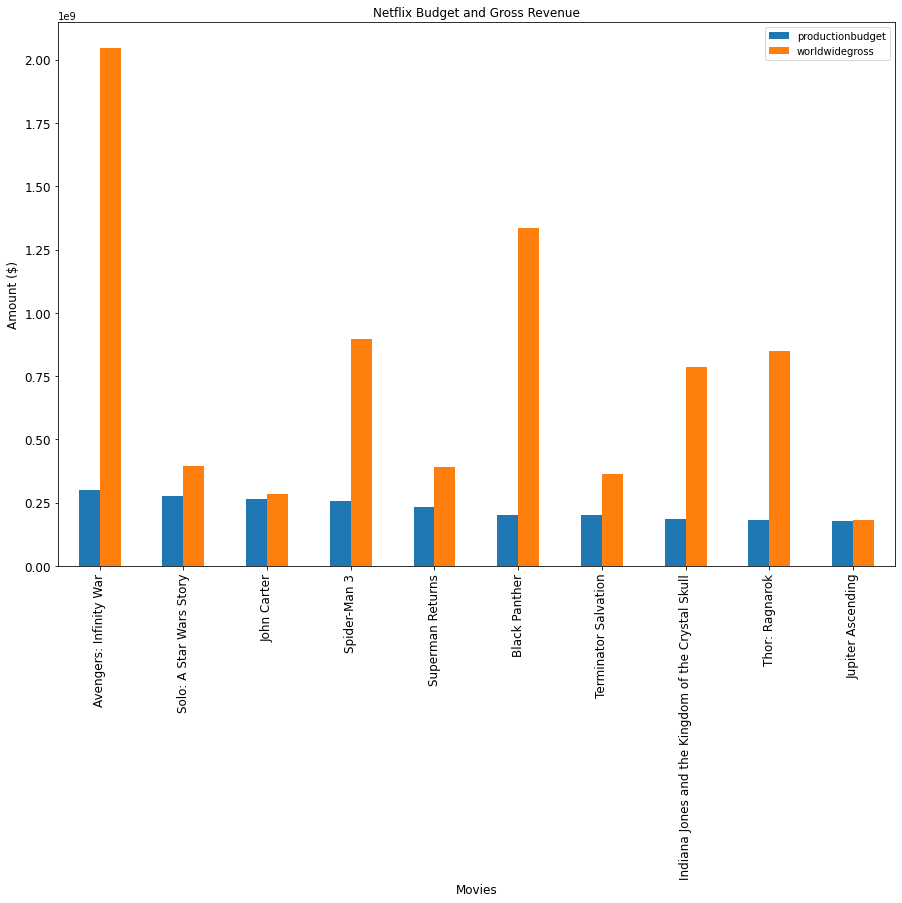

In [103]:
# Plot netflix top 10
# # Extract title, productionbudget, domesticgross, worldwidegross
ax = NetflixBudgetMerged_top10[['productionbudget', 'worldwidegross']].plot(kind='bar', title ="Netflix Budget and Gross Revenue", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Movies", fontsize=12)
ax.set_xticklabels(NetflixBudgetMerged_top10['title'], rotation=90)
ax.set_ylabel("Amount ($)", fontsize=12)
plt.savefig('netflixbudget_gross_top10.png')
plt.show()

In [49]:
conn.close()